# Example showing the output produced by the photoionization models

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from astropy.table import Table
import pandas as pd

### Loading in the line labels, luminosity and parameter value files

In [2]:
! pip install fonttools

In [3]:
all_labels = np.load('../models/test_model_high_res/test_model_high_res_age_2Myr_unattenuated_emission_line_labels.npy')
all_labels_dict = dict(zip(all_labels, range(len(all_labels))))
all_line_luminosities = np.load('../models/test_model_high_res/test_model_high_res_age_2Myr_unattenuated_emission_line_luminosity_file.npy')
parameter_values = np.load('../models/test_model_high_res/test_model_high_res_age_2Myr_unattenuated_parameters_file.npy')
all_line_luminosities.shape

(24, 33, 9, 68)

In [4]:
all_labels = np.load('../models/lowZ_photoionization_model/test_model_high_res_age_2Myr_Z_m2.0_0.7_unattenuated_emission_line_labels.npy')
all_labels_dict = dict(zip(all_labels, range(len(all_labels))))
all_line_luminosities = np.load('../models/lowZ_photoionization_model/test_model_high_res_age_2Myr_Z_m2.0_0.7_unattenuated_emission_line_luminosity_file.npy')
parameter_values = np.load('../models/lowZ_photoionization_model/test_model_high_res_age_2Myr_Z_m2.0_0.7_unattenuated_parameters_file.npy')
all_line_luminosities.shape

(38, 33, 9, 73)

### Luminosity and parameter files are structured in multidimensional way
- Dimension 1: Metallicities
- Dimension 2: Ionization parameter
- Dimension 3: Dust-to-metal ratio
- Dimension 4: Dust attenuation
- The last dimension in the parameter file has the parameter values of the main parameters (as listed above) + derived parameters. The last dimension of the luminosity file contains the luminosities of all the emission lines in the line labels file.

In [5]:
parameter_values.shape

(38, 33, 9, 3)

In [6]:
all_line_luminosities.shape

(38, 33, 9, 73)

### import sdss data

In [7]:
#SDSS DR7 table with SpecObjIDs for crossmatching and other measurements
sdss_specobjall_dr7 = Table.read("/Users/dirk/Documents/PhD/scripts/catalogs/SpecObjAll_dr7.fits").to_pandas()

#SDSS DR7 table with galaxy emission line fluxes
sdss_gal_line_dr7 = Table.read("/Users/dirk/Documents/PhD/scripts/catalogs/gal_line_dr7_v5_2.fit").to_pandas()

sdss = pd.concat([sdss_specobjall_dr7[["SPECOBJID","MJD","Z"]], sdss_gal_line_dr7], axis=1)

#sdss.columns.to_list()

### Plotting the modelled emission line ratios in a BPT diagram

45 47 56 57


/Users/dirk/opt/anaconda3/envs/CloudyGalaxy/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/dirk/opt/anaconda3/envs/CloudyGalaxy/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


(50, 50)
(50, 50)


<ipython-input-8-6d2ab3f864b7>:41: RuntimeWarning: divide by zero encountered in log10
  ax1.contourf(xedges[:-1], yedges[::-1][:-1], np.rot90(np.log10(binned_sdss)), extent=[-2.0,0.2,-1.5,1.], levels=[2.5,3,3.5,4], zorder=3, cmap='Greys', alpha=0.7)
<ipython-input-8-6d2ab3f864b7>:42: RuntimeWarning: divide by zero encountered in log10
  ax1.contour(xedges[:-1], yedges[::-1][:-1], np.rot90(np.log10(binned_sdss)), extent=[-2.0,0.2,-1.5,1.], levels=[2.5,3,3.5,4], zorder=3, colors='k', linewidths=0.5)
<ipython-input-8-6d2ab3f864b7>:46: RuntimeWarning: divide by zero encountered in log10
  ax1.contourf(xedges[:-1], yedges[::-1][:-1], np.rot90(np.log10(binned_sdss)), extent=[-2.0,0.2,-1.5,1.], levels=[2.5,3,3.5,4], zorder=3, cmap='Blues', alpha=0.7)
<ipython-input-8-6d2ab3f864b7>:47: RuntimeWarning: divide by zero encountered in log10
  ax1.contour(xedges[:-1], yedges[::-1][:-1], np.rot90(np.log10(binned_sdss)), extent=[-2.0,0.2,-1.5,1.], levels=[2.5,3,3.5,4], zorder=3, colors='mediumblue',

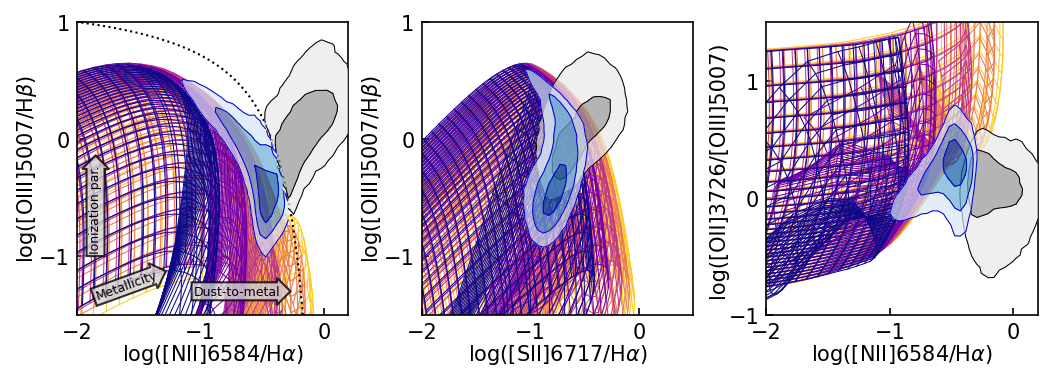

In [8]:
labels = ['O__2_372603A', 'H__1_486133A', 'O__3_500684A', 'H__1_656281A', 'N__2_658345A', 'S__2_671644A']
OII, Hb, OIII, Ha, NII, SII = [all_labels_dict.get(key) for key in labels]
print(Hb, OIII, Ha, NII)
colors = matplotlib.cm.get_cmap('plasma')

matplotlib.rcParams.update({'xtick.direction': 'in'})
matplotlib.rcParams.update({'ytick.direction': 'in'})
matplotlib.rcParams.update({'font.size': 8})

fig, (ax1, ax2, ax3) = plt.subplots(1,3,dpi=150, figsize = [7.,2.5])
line=np.linspace(-2.5,0.0)
ax1.plot(line, 0.61/(line-0.05) + 1.3, c='k', linestyle=':', linewidth=1, zorder=3)

sf_mask = ~[(np.log10(sdss["OIII_5007_FLUX"]/sdss["H_BETA_FLUX"]) > 0.61*(np.log10(sdss["NII_6584_FLUX"]/sdss["H_ALPHA_FLUX"]) - 0.05)**-1 + 1.3) | (np.log10(sdss["NII_6584_FLUX"]/sdss["H_ALPHA_FLUX"])>0.0)][0]

#ax1.scatter(np.log10(sdss['NII_6584_FLUX']/sdss['H_ALPHA_FLUX']), np.log10(sdss['OIII_5007_FLUX']/sdss['H_BETA_FLUX']), s=0.1, c='k', alpha =1, zorder=3, edgecolor='none')
#ax2.scatter(np.log10(sdss['SII_6717_FLUX']/sdss['H_ALPHA_FLUX']), np.log10(sdss['OIII_5007_FLUX']/sdss['H_BETA_FLUX']), s=0.1, c='k', alpha =1, zorder=3, edgecolor='none')
#ax3.scatter(np.log10(sdss['NII_6584_FLUX']/sdss['H_ALPHA_FLUX']), np.log10(sdss['OII_3726_FLUX']/sdss['OIII_5007_FLUX']), s=0.1, c='k', alpha =1, zorder=3, edgecolor='none')

#ax1.scatter(np.log10(sdss['NII_6584_FLUX']/sdss['H_ALPHA_FLUX'])[~sf_mask], np.log10(sdss['OIII_5007_FLUX']/sdss['H_BETA_FLUX'])[~sf_mask], s=0.5, c='grey', alpha =0.01, zorder=3)
#ax2.scatter(np.log10(sdss['SII_6717_FLUX']/sdss['H_ALPHA_FLUX'])[~sf_mask], np.log10(sdss['OIII_5007_FLUX']/sdss['H_BETA_FLUX'])[~sf_mask], s=0.5, c='grey', alpha =0.01, zorder=3)
#ax3.scatter(np.log10(sdss['NII_6584_FLUX']/sdss['H_ALPHA_FLUX'])[~sf_mask], np.log10(sdss['OII_3726_FLUX']/sdss['OIII_5007_FLUX'])[~sf_mask], s=0.5, c='grey', alpha =0.01, zorder=3)

for i in np.arange(0,9)[::-2]:
    ax1.plot(np.log10(all_line_luminosities[:,:,i,NII]/all_line_luminosities[:,:,i,Ha]), 
             np.log10(all_line_luminosities[:,:,i,OIII]/all_line_luminosities[:,:,i,Hb]), c=colors(i/9), linewidth=0.5)
    ax1.plot(np.log10(all_line_luminosities[:,:,i,NII]/all_line_luminosities[:,:,i,Ha]).T, 
             np.log10(all_line_luminosities[:,:,i,OIII]/all_line_luminosities[:,:,i,Hb]).T, c=colors(i/9), linewidth=0.5)
    ax2.plot(np.log10(all_line_luminosities[:,:,i,SII]/all_line_luminosities[:,:,i,Ha]), 
             np.log10(all_line_luminosities[:,:,i,OIII]/all_line_luminosities[:,:,i,Hb]), c=colors(i/9), linewidth=0.5)
    ax2.plot(np.log10(all_line_luminosities[:,:,i,SII]/all_line_luminosities[:,:,i,Ha]).T, 
             np.log10(all_line_luminosities[:,:,i,OIII]/all_line_luminosities[:,:,i,Hb]).T, c=colors(i/9), linewidth=0.5)
    ax3.plot(np.log10(all_line_luminosities[:,:,i,NII]/all_line_luminosities[:,:,i,Ha]), 
             np.log10(all_line_luminosities[:,:,i,OII]/all_line_luminosities[:,:,i,OIII]), c=colors(i/9), linewidth=0.5)
    ax3.plot(np.log10(all_line_luminosities[:,:,i,NII]/all_line_luminosities[:,:,i,Ha]).T, 
             np.log10(all_line_luminosities[:,:,i,OII]/all_line_luminosities[:,:,i,OIII]).T, c=colors(i/9), linewidth=0.5)


binned_sdss, xedges, yedges = np.histogram2d(np.log10(sdss['NII_6584_FLUX']/sdss['H_ALPHA_FLUX'])[~sf_mask], np.log10(sdss['OIII_5007_FLUX']/sdss['H_BETA_FLUX'])[~sf_mask], bins=50, range=[[-2.0,0.25],[-1.5,1.05]])
print(binned_sdss.shape)
ax1.contourf(xedges[:-1], yedges[::-1][:-1], np.rot90(np.log10(binned_sdss)), extent=[-2.0,0.2,-1.5,1.], levels=[2.5,3,3.5,4], zorder=3, cmap='Greys', alpha=0.7)
ax1.contour(xedges[:-1], yedges[::-1][:-1], np.rot90(np.log10(binned_sdss)), extent=[-2.0,0.2,-1.5,1.], levels=[2.5,3,3.5,4], zorder=3, colors='k', linewidths=0.5)

binned_sdss, xedges, yedges = np.histogram2d(np.log10(sdss['NII_6584_FLUX']/sdss['H_ALPHA_FLUX'])[sf_mask], np.log10(sdss['OIII_5007_FLUX']/sdss['H_BETA_FLUX'])[sf_mask], bins=50, range=[[-2.0,0.25],[-1.5,1.05]])
print(binned_sdss.shape)
ax1.contourf(xedges[:-1], yedges[::-1][:-1], np.rot90(np.log10(binned_sdss)), extent=[-2.0,0.2,-1.5,1.], levels=[2.5,3,3.5,4], zorder=3, cmap='Blues', alpha=0.7)
ax1.contour(xedges[:-1], yedges[::-1][:-1], np.rot90(np.log10(binned_sdss)), extent=[-2.0,0.2,-1.5,1.], levels=[2.5,3,3.5,4], zorder=3, colors='mediumblue', linewidths=0.5)

binned_sdss, xedges, yedges = np.histogram2d(np.log10(sdss['SII_6717_FLUX']/sdss['H_ALPHA_FLUX'])[~sf_mask], np.log10(sdss['OIII_5007_FLUX']/sdss['H_BETA_FLUX'])[~sf_mask], bins=50, range=[[-2.0,0.55],[-1.5,1.05]])
ax2.contourf(xedges[:-1], yedges[::-1][:-1], np.rot90(np.log10(binned_sdss)), extent=[-2.0,0.5,-1.5,1.], levels=[2.5,3,3.5,4], zorder=3, cmap='Greys', alpha=0.7)
ax2.contour(xedges[:-1], yedges[::-1][:-1], np.rot90(np.log10(binned_sdss)), extent=[-2.0,0.5,-1.5,1.], levels=[2.5,3,3.5,4], zorder=3, colors='k', linewidths=0.5)

binned_sdss, xedges, yedges = np.histogram2d(np.log10(sdss['SII_6717_FLUX']/sdss['H_ALPHA_FLUX'])[sf_mask], np.log10(sdss['OIII_5007_FLUX']/sdss['H_BETA_FLUX'])[sf_mask], bins=50, range=[[-2.0,0.55],[-1.5,1.05]])
ax2.contourf(xedges[:-1], yedges[::-1][:-1], np.rot90(np.log10(binned_sdss)), extent=[-2.0,0.5,-1.5,1.], levels=[2.5,3,3.5,4], zorder=3, cmap='Blues', alpha=0.7)
ax2.contour(xedges[:-1], yedges[::-1][:-1], np.rot90(np.log10(binned_sdss)), extent=[-2.0,0.5,-1.5,1.], levels=[2.5,3,3.5,4], zorder=3, colors='mediumblue', linewidths=0.5)

binned_sdss, xedges, yedges = np.histogram2d(np.log10(sdss['NII_6584_FLUX']/sdss['H_ALPHA_FLUX'])[~sf_mask], np.log10(sdss['OII_3726_FLUX']/sdss['OIII_5007_FLUX'])[~sf_mask], bins=50, range=[[-2.01,0.25],[-1.,1.55]])
ax3.contourf(xedges[:-1], yedges[::-1][:-1], np.rot90(np.log10(binned_sdss)), extent=[-2.0,0.2,-1.,1.5], levels=[2.5,3,3.5,4], zorder=3, cmap='Greys', alpha=0.7)
ax3.contour(xedges[:-1], yedges[::-1][:-1], np.rot90(np.log10(binned_sdss)), extent=[-2.0,0.2,-1.,1.5], levels=[2.5,3,3.5,4], zorder=3, colors='k', linewidths=0.5)

binned_sdss, xedges, yedges = np.histogram2d(np.log10(sdss['NII_6584_FLUX']/sdss['H_ALPHA_FLUX'])[sf_mask], np.log10(sdss['OII_3726_FLUX']/sdss['OIII_5007_FLUX'])[sf_mask], bins=50, range=[[-2.01,0.25],[-1.,1.55]])
ax3.contourf(xedges[:-1], yedges[::-1][:-1], np.rot90(np.log10(binned_sdss)), extent=[-2.0,0.2,-1.,1.5], levels=[2.5,3,3.5,4], zorder=3, cmap='Blues', alpha=0.7)
ax3.contour(xedges[:-1], yedges[::-1][:-1], np.rot90(np.log10(binned_sdss)), extent=[-2.0,0.2,-1.,1.5], levels=[2.5,3,3.5,4], zorder=3, colors='mediumblue', linewidths=0.5)

# Arrow Metallicity
bbox_props = dict(boxstyle="rarrow", fc='lightgrey', ec="k", lw=1, alpha=0.8)
t = ax1.text(-1.6, -1.25, "Metallicity", ha="center", va="center", rotation=20,
            size=6,
            bbox=bbox_props)

bb = t.get_bbox_patch()
bb.set_boxstyle("rarrow", pad=0.2)

# Arrow Ionization parameter
bbox_props = dict(boxstyle="rarrow", fc='lightgrey', ec="k", lw=1, alpha=0.8)
t = ax1.text(-1.85, -0.6, "Ionization par.", ha="center", va="center", rotation=90,
            size=6,
            bbox=bbox_props)

bb = t.get_bbox_patch()
bb.set_boxstyle("rarrow", pad=0.2)

# Arrow Dust-to-metal
bbox_props = dict(boxstyle="rarrow", fc='lightgrey', ec="k", lw=1, alpha=0.8)
t = ax1.text(-0.7, -1.3, "Dust-to-metal", ha="center", va="center", rotation=0,
            size=6,
            bbox=bbox_props)

bb = t.get_bbox_patch()
bb.set_boxstyle("rarrow", pad=0.2)

ax1.set_xlabel('log([NII]6584/H$\\alpha$)', labelpad=0)
ax1.set_ylabel('log([OIII]5007/H$\\beta$)', labelpad=0)
ax1.set_xlim(-2.0,0.2)
ax1.set_ylim(-1.5,1.)
ax1.set_yticks([-1,0,1])

ax2.set_xlabel('log([SII]6717/H$\\alpha$)', labelpad=0)
ax2.set_ylabel('log([OIII]5007/H$\\beta$)', labelpad=0)
ax2.set_xlim(-2.0,0.5)
ax2.set_ylim(-1.5,1.)
ax2.set_yticks([-1,0,1])

ax3.set_xlabel('log([NII]6584/H$\\alpha$)', labelpad=0)
ax3.set_ylabel('log([OII]3726/[OIII]5007)', labelpad=0)
ax3.set_xlim(-2.0,0.2)
ax3.set_ylim(-1.,1.5)
ax3.set_yticks([-1,0,1])

plt.subplots_adjust(wspace=0.27, left=0.065, right=0.98, bottom=0.2, top=0.98)

plt.savefig('BPT_diagrams_revised.pdf')
